# CHAPTER 5 - 지도학습 : 회귀

## 지도학습(Supervised Learning)
- 회귀 : 입력에 대해 연속적인 값을 대응시키는 문제
- 분류 : 입력에 대해 순서가 없는 클래스(라벨)를 대응시키는 문제

# _after

분류(Classification) 
- 주어진 데이터(feature)를 정해진 Category(label, Class)를 분류하는 문제 -> X에 대하여  <span style = 'color:red'> 이산형 변수</span> Y를 예측
- 분류할 Category(Label)에 따라 '이진 분류' 혹은 '다중 분류'로 나뉨
- 대표적인 알고리즘: K-NN, Navie Bayes, Supoort vector, Machine Decesion 등
- 예시 문제: '대출 연제 탐지 여부' ("연체할 것이다 vs 아니다"라는 이진 분류)

회귀(Regression)
- 주어진 데이터(Feature)를 통해 연속된 값을 예측하는 문제 -> X에 대하여  <span style = 'color:red'> 연속형 변수</span> Y를 예측
- 대표적인 알고리즘: Linear Regression, Ridge, Lasso 등
- 예시 문제: '서울 아파트 집값 예측'(서울 아파트 집값이 얼마 일것이다)

# 5.1 1차원 입력 직선 모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



np.random.seed(seed=1) 
X_min = 4 
X_max = 30 
X_n = 16 
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] 
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
+ 4 * np.random.randn(X_n) 
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) 

In [2]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [3]:
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [4]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


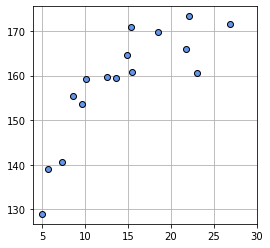

In [5]:
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

## 5.1.1 직선모델

## 직선의 방정식

$$y(x) = w_0x+w_1$$

- $w_0$ : 기울기
- $w_1$ : 절편
- $y(x)$ : x에 대한 t의 예측치

## 5.1.2 제곱 오차 함수


J는 평균제곱오차(mean square error,MSE)로 직선과 점의 차의 제곱의 평균이다

$$J = \frac{1}{N} \sum_{n=0}^{N-1}(y_n - t_n)^2 $$

$y_n$은 직선모델에 $x_n$을 넣었을때의 출력

$$y_n=y(x_n)=w_0x_n+w_1$$

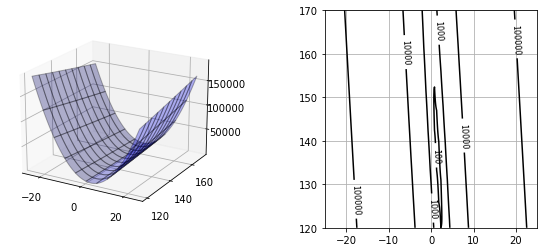

In [6]:
from mpl_toolkits.mplot3d import Axes3D

def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y - t)**2)
    return mse

xn = 100 
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color='blue', edgecolor='black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=[100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()


$w_0$방향의 변화에 J가 크게 변한다
    - $w_0$의 값에 오차가 영향을 많이 받는다
    
등고선 그래프를 보면 최저점의 위치를 짐작 할 수 있다

# _after

MSE(Mean Squared Error, 평균 제곱 오차), 
MAE(Mean Absolute Error, 평균 절대 오차)...

-> 낮은값을 예측했는지, 높은값을 예측햇는지 알 수 없다

## 5.1.3 매개 변수 구하기(경사 하강법)



---
## 경사하강법
J가 가장 작아지는 $w_0$와 $w_1$을 구하기위해 경사 하강법을 사용한다

경사하강법(steepest descent nethod)는 1차 근삿값을 발견하는대에 최젇화된 알고리즘이다.

기본 아이디어는 함수의 기울기를 구하여 기울기가 낮은쪽으로 이동시켜 극값에 이를때까지 반복하는 것이다

---
### 경사하강법의 개요
1. 초기에 적당한 $w_0$와 $w_1$을 결정한다(이 지점은 함수 J위의 한 점에 대응된다.)
2. 이 지점에서 기울기를 확인하고 J가 가장 감소하는 방향으로  $w_0$와 $w_1$를 조금 이동시킨다
3. 이 과정을 반복하여 최종적으로 J의 바닥을 찾게된다

---
조금 더 자세히 수식적으로 표현하자면

J를 $w_0$와 $w_1$ 에대해 편미분하여 $dJ/dw_0$ 와 $dJ/dw_1$을 구할 수 있다.

이것을 벡터로 표시하면 

$$\nabla w J = (dJ/dw_0,dJ/dw_1)$$

각 위치의 기울기가 된다

J를 최소화 하기 위해서 기울기의 반대방향 $-\nabla w J$으로 위치를 조정하게 된다

w의 갱신방법 (학습법칙)을 수식으로 표현하면
$$w(t+1) = w(t) - \alpha \nabla_{w}J|_{w(t)}$$
로 표현 할 수 있다




# _after

![parameter-updata](https://mblogthumb-phinf.pstatic.net/MjAyMDAzMTZfMTQ2/MDAxNTg0MzAxMTIxNTE1.MSfJ4ch9dy_oRPgmvgAEzRtB-E12P-cf20QLXeIVwo4g.MvGGYWMDQQUbQ9-VzmT3jTZTXoNBlW4PLM5-TOimmy8g.PNG.jevida/031520_1938_Gradient1.png?type=w800)

기울기에 -를 붙이면 기울기가 +(오른쪽 위를 향할때) 일때는 왼쪽방향, 기울기가 -(오른쪽 아래를 향할때) 일때는 오른쪽 방향을 가르키게 된다

In [7]:
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    return d_w0, d_w1


In [8]:
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))


[5046.3  301.8]


그래프와 같이 $w_0$방향의 기울기가 $w_1$의 기울기보다 크게 출력되었다

반복 횟수 13820
W=[1.539947, 136.176160]
dMSE=[-0.005794, 0.099991]
MSE=49.027452


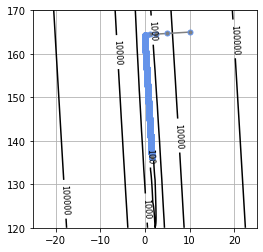

In [9]:
def fit_line_num(x, t):
    w_init = [10.0, 165.0]
    alpha = 0.001
    i_max = 100000
    eps = 0.1
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        if max(np.absolute(dmse)) < eps:
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i


plt.figure(figsize=(4, 4))
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt='%1.0f', fontsize=8) 
plt.grid(True)

W0, W1, dMSE, W_history = fit_line_num(X, T)

print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE=[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()


`fit_line_num(x,t)`는 데이터 x,t를 인수로 하여 mse_line을 최소화하는 w 를 돌려준다

w0=1.540, w1=136.176
SD=7.002 cm


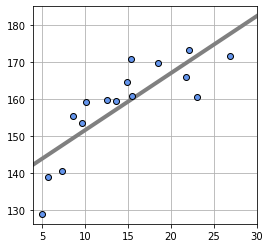

In [10]:

def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)



plt.figure(figsize=(4, 4))
W=np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0={0:.3f}, w1={1:.3f}".format(W0, W1))

print("SD={0:.3f} cm".format(np.sqrt(mse)))
show_line(W) 
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black') 
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


표준편차(standard deviation) : 평균 제곱 오차의 제곱근

이 문제의 경우 미분값이 convex하기 때문에 값이 하나로 수렴되지만 실제의 경우 그렇지 않다

이런한경우 차원이 다차원이면 해석적인 해를 사용하기 쉽지않다

이러한 상황에서 경사하강법이 사용된다

## 5.1.4 선형 모델 매개 변수의 해석해

경사하강법은 반복계산에 의해 근사값을 구하는 수치계산법이다. 이러한 풀이를 수치해 라고 한다.
>직선 모델의 경우 근사적인 해석이 아니라 방정식을 해결하여 정확한 해를 구할 수 있다. 이러한 풀이를 해석해 라고 한다

해석해가 경사하강법에비해 쉽고 빠르나 해석해가 구해지지 않는 다차원방정식을 이루고있는문제에서는 경사하강법이 강력하게 사용 될 수 있다.



w0=1.558, w1=135.872
SD=7.001 cm


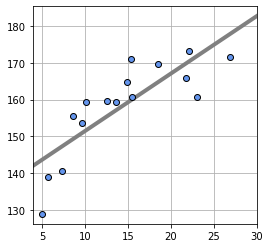

In [11]:

def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

W = fit_line(X, T)
print("w0={0:.3f}, w1={1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()


# _after

> ## 커널법

>데이터의 분포가 어떤 분포를 따르는지 알 수 없는 경우에 데이터의 분포를 추정하여 확률 밀도를 추정하는데 이 추정 방법 중 하나

>확률 밀도 추정의 목표는 확률 밀도, 즉 p(x)를 구하는 것이다. 이는 일정한 단위 안에 데이터가 몇개나 포함되는지의 값과 같다. 그러므로 p(x)가 다음 식에 비례함을 알 수 있다.

>$p(x) = \frac{K}{NV}$

> - N :전체 데이터 샘플의 수, 
> - K :  해당 지역 안에 있는 데이터의 수
> - V : 지역의 부피

> 이 식을 통해 우리는 일정 단위 안에 데이터가 포함될 확률, 즉 확률 밀도를 구할 수 있다. 이 식에서 N값은 고정인 상태고 V를 고정했을 때 그 안에 몇 개가 들어갈 수 있는지(K)를 찾아냄으로써 확률 밀도를 구하는 방식을 커널법이라고 한다.

> 이와 반대로, 안에 들어갈 개수(K)를 고정하고 그 부피를 결정하는 것을 K-nearest neighbor라고 한다.

# 5.2 2차원 입력면 모델

In [12]:

X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed=1)
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [13]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))


[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


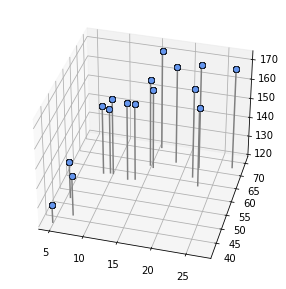

In [14]:

def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


plt.figure(figsize=(6, 5))
ax = plt.subplot(1,1,1,projection='3d')
show_data2(ax, X0, X1, T)
plt.show()


## 5.2.1 데이터의 표시 방법

## 5.2.2 면 모델

면의 함수는
$$y(x)=w_0x_0+w_1x_1+w_2$$
로 표현된다

SD=12.876 cm


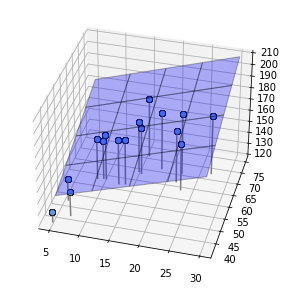

In [15]:

def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0]*px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black') 

def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t)**2)
    return mse

plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W) 
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


## 5.2.3 매개 변수의 해석해

데이터에 적합한 $[w_0,w_1,w_2]$를 얻기위해 1차원의 선 모델과 마찬가지로 평균 제곱오차를 사용한다

$$J = \frac{1}{N} \sum_{n=0}^{N-1}(y(x_n)-t_n)^2 =  \frac{1}{N} \sum_{n=0}^{N-1}(w_0x_{n,0}+w_1x_{n,1}+w_2-t_n)^2  $$

편미분한값을 0으로두고 연립

w0=0.5, w1=1.1, w2=89.0
SD=2.546 cm


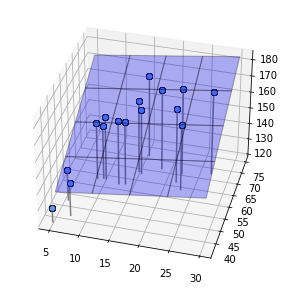

In [16]:
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2]) 


plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD={0:.3f} cm".format(np.sqrt(mse)))
plt.show()


# 5.3 D차원 선형 회귀 모델

## 5.3.1 D차원 선형 회귀 모델

## 선형성

직선처럼 똑바른 도형, 또는 그와 비슷한 성질을 갖는 대상이라는 뜻으로, 이러한 성질을 갖고 있는 변환 등에 대하여 쓰는 용어.

## 회귀

### 회귀모델

연속형데이터 Y와 Y의 원인이 된다고 추정되는 X의 관계를 추정하기위해 만든 다항식

$$Y =f(x)$$

실제 데이터에서는 정확함값을 추정할 수 없기에 오차항을 추가한다

$$Y =f(x)+e$$

따라서 회귀는 잔차가 평균으로 회귀하는것을 의미한다

## 선형회귀모델

y와 한 개 이상의 독립 변수 X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다.

## 5.3.2 매개 변수의 해석해

## 해석해를 구하는 방법
1. 다차원의 J에서 J를 각각의 $w_i$에 대해 편미분한다

2. 벡터로 하나로 묶어 행렬로 만든다

3. w의 행렬을 구한다

> 행렬은 무어-펜로즈 의사역행렬의 형태로 나온다
> - 무어 펜로즈 의사역행렬
>  - 정방행렬이 아닐때 역행렬의 역할을 할 수 있도록 행렬식을 변환하여 표기하는 방법

# _after
유사역행렬(역행렬이 존재하지 않는 경우 -> 정방행렬이 일 경우 포함)
무어-펜로즈 유사 역행렬 / 특이값 분해(svd)를 이용하여 쉽게 유사 역행렬을 구함

![SVD_exmample](https://raw.githubusercontent.com/angeloyeo/angeloyeo.github.io/master/pics/2019-08-01_SVD/pic_SVD.png)

- $\sum = \begin{bmatrix} \sum_{r}  & 0_{r * (n-r)} \\ 0_{r * (m-r)} & 0_{(m-r) * (n-r)}  \end{bmatrix} $ 
  -> $ \sum_{r} $ 은 r * r 대각 행렬(대각 성분은 양의 실수, 특이값이 큰 수 ~ 작은 수로 정렬) / 나머지는 0행렬

## 5.3.3 원점을 지나지 않는 면에 대한 확장

D차원의 x의 문제에 대해서 D+1번째차원에 항상 1을얻는 요소를 추가하면 자유롭게 움직이는 모델을 표현할 수 있다

# 5.4 선형 기저 함수 모델

## 선형기저함수 
    데이터를 기저함수의 공간으로 변환시켜준다

## 기저함수
    바탕함수, 함수공간의 기저인 함수를 말한다. 모든 벡터공간의 함수들을 기저 벡터의 선형결합으로 표현할 수 있듯이 모든 연속함수들은 기저 함수들의 선형결합으로 표시할 수 있다
---
## 선형기저함수모델

1차원 $x = x_0$를 받았을떄, M = 4라면 

$$ y(x,w) = w_0\phi_0(x_0)+w_1\phi_1(x_0)+w_2\phi_2(x_0)+w_3\phi_3(x_0)+w_4$$

로 확장할 수 있다

이것은 다차원(여기서는 4차원)의 입력을 받는 선형회기모델로 해석 될 수 있다

> - 전처리로 1 차원 데이터 x를 M차원의 데이터 벡터로 전환하는것으로 해석 될 수 있다
> - M차원의 입력 x 에대해 선형회귀모델을 적용한 것으로 볼 수 있다

> 즉, 선형기저함수모델은 $\phi(x_0)$ 를 다차원 입력 x로 해석한 선형회기모델과 같다

선형회기모델의 경우 w가 의사역행렬로 표현되며 입력차원에 따라 결정된다. (w = 입력차원X1 크기의 행렬)

따라서 선형기저함수모델의 경우 w는 M출력의 차원이 결정된다 (w = M X 1 크기의 행렬)

선형기저함수모델의 경우 다차원의 입력으로 확장될 수 있는데, a차원의경우 w 행렬의 크기는 M X a 로 결정된다

In [17]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']


In [18]:
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))


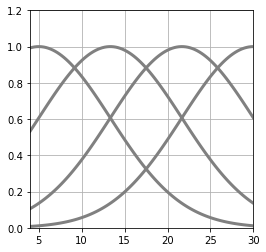

In [19]:
M = 4
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0] # (A)
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()


In [20]:
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x)
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y


In [21]:
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse


In [22]:
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w


W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


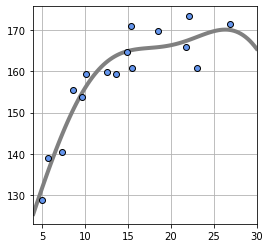

In [23]:
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


# 5.5 오버피팅의 문제

## 오버피팅
    학습 데이터를 과하게 학습(overfitting)하는 것을 뜻한다. 일반적으로 학습 데이타는 실제 데이터의 부분 집합이므로 학습데이타에 대해서는 오차가 감소하지만 실제 데이타에 대해서는 오차가 증가하게 된다.


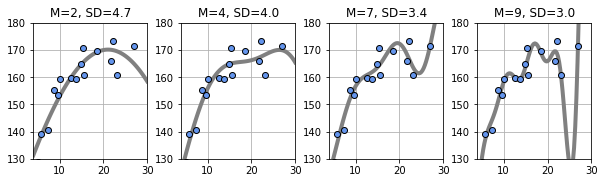

In [24]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)
    
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()


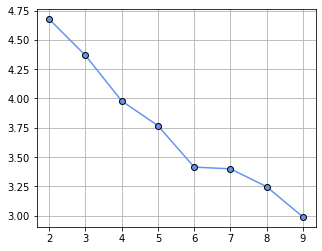

In [25]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))
plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()


## 홀드아웃 검증
    홀드아웃 검증 : 데이터를 훈련 데이터와 테스트 데이터로 나눈 후 테스트 데이터를 사용하지 않는 검증 방법. 테스트 데이터는 사용했을 때의 정확도를 평가해 성능을 판단합니다. 보통 교차 검증에는 사용하지 않습니다.

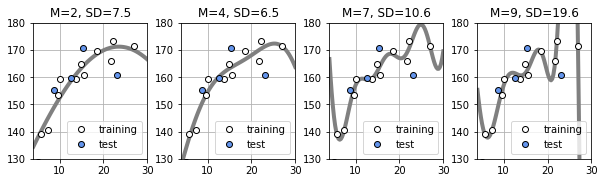

In [26]:

X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

plt.figure(figsize=(10, 2.5))


plt.subplots_adjust(wspace=0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

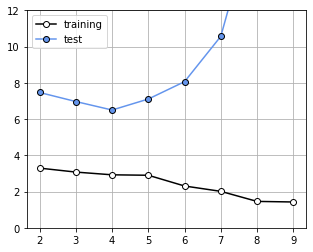

In [27]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M)) 
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


## K-fold cross validation
    데이터를 K개의 그룹으로 나눈 후 그룹 하나를 제외한 나머지 데이터를 훈련 데이터로 설정한다. 사용하지 않은 하나의 그룹에서는 테스트를 실행한다. 테스트 데이터에서 얻은 정밀도에 평균과 표준편차를 구하는 것으로 평가를 실행한다. (K는 5~10으로 설정)


## LOOCV(leave one out cross validation)
    K겹 교차 검증에서 K가 데이터 갯수와 같을 때를 뜻한다. (데이터 수가 적을 때 사용)

In [28]:
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i] 
        t_train = t[np.fmod(range(n), k) != i] 
        x_test = x[np.fmod(range(n), k) == i] 
        t_test = t[np.fmod(range(n), k) == i] 
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [29]:
np.fmod(range(10),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype=int32)

In [30]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782016,  18.30921743,  47.52459642]))

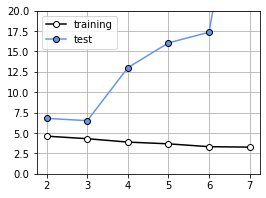

In [31]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

SD=4.37 cm


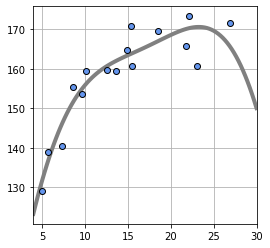

In [32]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

# 5.6 새로운 모델의 생성

## 모델의 함수설정

## 파웰알고리즘
    최소화 함수를 사용할때, 늦게 수렴되거나 수렴이 보장되지 않는경우 실험적으로 사용하는 알고리즘

# _after

Powell's method 

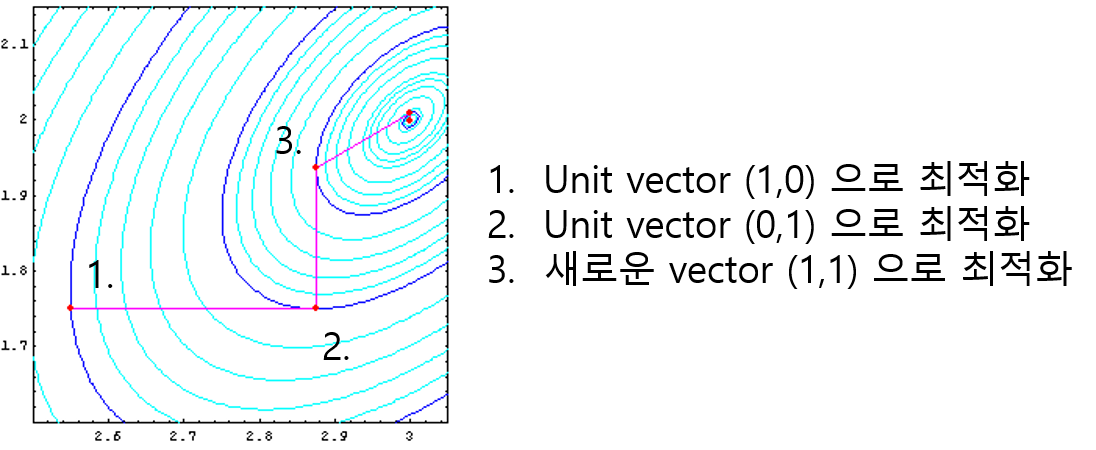

    각 Unit vector 의 방향과 순서대로 iteartion 을 진행한 뒤, 최초 지점에서 현재 위치까지의 방향을 새로운 Unit vector 삼아서 iteration 을 진행

In [33]:
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y 

def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 

def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [34]:
from scipy.optimize import minimize 

def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


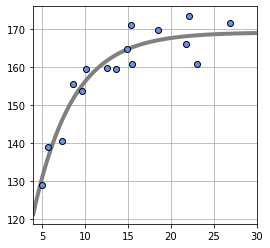

In [35]:
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


# 5.7 모델의 선택

홀드아웃검증과 교차검증모겔로 모델의 좋고 나쁨을 평가한다

오차의 SD(표준편차)를 보고 오차의 SD가 더작은 모델을 일반화가 잘 된 모델로보고 선택 할 수 있다.


Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


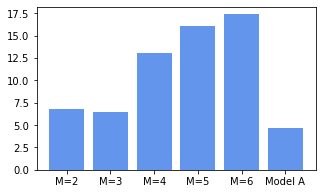

In [36]:
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()


# 5.8 정리

## 데이터 선택의 흐름

>1. 입력변수와 목표변수의 데이터
2. 목적함수 설정
3. 모델의 후보 결정
4. 데이터 사용을위한 전처리
    - ex) 데이터를 사용에맞게 테스트데이터와 훈련데이터로 나눈다
5. 훈련데이터를 사용하여 원하는 함수가 최소(혹은 최대)가 되도록 모델의 매게변수 w를 설정한다
6. 모델 매개변수를 사용하여 테스트 데이터의 입력데이터X에서 목표데이터 t의 예측을 실시하고, 가장 오차가 적은 모델을 선택한다

모델이 결정되면 보유한 데이터를 모두 사용하여 모델 매개변수를 최적화한다. 최적화된 모델이 미지의 입력에 대해 가장 유력한 예측 모델이 된다